Features:
● Gender: Male or Female.
● Age: The person’s age in years.
● Height: Height in meters.
● Weight: Weight in kilograms.
● family_history_with_overweight: Whether the person has a family history of being
overweight (yes/no).
● FAVC: If the person frequently consumes high-calorie foods (yes/no).
● FCVC: Frequency of vegetable consumption (scale from 1 to 3).
● NCP: Number of main meals per day.
● CAEC: Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
● SMOKE: Whether the person smokes (yes/no).
● CH2O: Daily water intake (scale from 1 to 3).
● SCC: If the person monitors their calorie intake (yes/no).
● FAF: Physical activity frequency (scale from 0 to 3).
● TUE: Time spent using technology (scale from 0 to 3).
● CALC: Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
● MTRANS: Main mode of transportation (Automobile, Bike, Motorbike, Public
Transportation, Walking).
Target Variable:
### ● NObeyesdad: Categorized as Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III

# IMPORTING LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### READING AND COMBINING THE TRAIN AND TEST DATASETS TO WORK IN PREPROCESSING AT ONCE

In [2]:
train_df=pd.read_csv('/content/Obesity_train_dataset.csv')
test_df=pd.read_csv('/content/Obesity_test_dataset.csv')
combined_df=pd.concat([train_df,test_df], ignore_index=True)

### PRINTING THE DATASET'S HEAD

In [3]:
combined_df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,26,1.67,104.59,yes,yes,3.00,3.0,Sometimes,no,1.57,no,0.21,0.882,Sometimes,Public_Transportation,Obesity_Type_III
2107,Male,20,1.87,75.00,no,yes,2.00,3.0,Frequently,no,1.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
2108,Male,27,1.77,118.15,yes,no,2.18,3.0,Sometimes,no,2.28,no,0.68,0.000,Sometimes,Automobile,Obesity_Type_II
2109,Male,31,1.89,129.35,yes,yes,2.50,3.0,Sometimes,yes,1.13,no,0.95,1.023,Sometimes,Public_Transportation,Obesity_Type_II
2110,Male,21,1.79,105.00,yes,yes,2.00,3.0,Always,no,1.00,no,0.00,0.000,Sometimes,Public_Transportation,Obesity_Type_I


In [4]:
#first I'm gonna change some columns names
combined_df.rename(columns={'NObeyesdad':'ObesityLevel'},inplace=True)
combined_df.rename(columns={'family_history_with_overweight':'FHWO'},inplace=True)
combined_df.tail()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,ObesityLevel
2106,Female,26,1.67,104.59,yes,yes,3.00,3.0,Sometimes,no,1.57,no,0.21,0.882,Sometimes,Public_Transportation,Obesity_Type_III
2107,Male,20,1.87,75.00,no,yes,2.00,3.0,Frequently,no,1.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
2108,Male,27,1.77,118.15,yes,no,2.18,3.0,Sometimes,no,2.28,no,0.68,0.000,Sometimes,Automobile,Obesity_Type_II
2109,Male,31,1.89,129.35,yes,yes,2.50,3.0,Sometimes,yes,1.13,no,0.95,1.023,Sometimes,Public_Transportation,Obesity_Type_II
2110,Male,21,1.79,105.00,yes,yes,2.00,3.0,Always,no,1.00,no,0.00,0.000,Sometimes,Public_Transportation,Obesity_Type_I


In [5]:
#dataset info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        2111 non-null   object 
 1   Age           2111 non-null   int64  
 2   Height        2111 non-null   float64
 3   Weight        2111 non-null   float64
 4   FHWO          2111 non-null   object 
 5   FAVC          2111 non-null   object 
 6   FCVC          2099 non-null   float64
 7   NCP           2111 non-null   float64
 8   CAEC          2111 non-null   object 
 9   SMOKE         2111 non-null   object 
 10  CH2O          2111 non-null   float64
 11  SCC           2111 non-null   object 
 12  FAF           2111 non-null   float64
 13  TUE           2111 non-null   float64
 14  CALC          2083 non-null   object 
 15  MTRANS        2111 non-null   object 
 16  ObesityLevel  2111 non-null   object 
dtypes: float64(7), int64(1), object(9)
memory usage: 280.5+ KB


# CHECKING NULLS AND DUPLICATED VALUES AND HANDING IT

In [6]:
print(combined_df.duplicated().sum())

24


In [7]:
combined_df.drop_duplicates(inplace=True)

In [8]:
combined_df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
FHWO,0
FAVC,0
FCVC,12
NCP,0
CAEC,0
SMOKE,0


WE TRIED TO FILL THE NULLS WITH THE DATA MEAN AND MODE BUT WE GOT MODELS OVERFITTING DUE TO PREPROCESSING LEAKAGE, SO WE PREFERED TO DROP THE NULLS

In [9]:
combined_df.dropna(inplace=True)

## ALL NULLS AND DUPLICATES ARE HANDLED SUCCESSFULLY

# SOME VISUALIZATIONS

In [10]:
categorical_cols = combined_df.select_dtypes(include=['object', 'category']).columns.tolist()
for i, col in enumerate(categorical_cols):
    fig = px.histogram(combined_df, x=col, title=f'Distribution of {col}')
    fig.show()

In [11]:
specific_cols = ['CAEC', 'CALC', 'MTRANS','ObesityLevel']  # replace with your actual column names

for col in specific_cols:
    counts = combined_df[col].value_counts().reset_index()
    counts.columns = [col, 'count']

    fig = px.pie(counts,
                 names=col,
                 values='count',
                 title=f'Distribution of {col}',
                 hole=0.4)

    fig.update_traces(textinfo='percent+label',
                      textposition='inside',
                      pull=[0.01]*len(counts))
    fig.update_layout(title_x=0.5)
    fig.show()


WE NEED TO CHANGE ALL THE 'OBJECT' DATA-TYPES TO 'INTEGER' OR 'FLOAT' BY NUMERIZING THESE COLUMNS

In [12]:
#checking the datatypes and null values
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        2051 non-null   object 
 1   Age           2051 non-null   int64  
 2   Height        2051 non-null   float64
 3   Weight        2051 non-null   float64
 4   FHWO          2051 non-null   object 
 5   FAVC          2051 non-null   object 
 6   FCVC          2051 non-null   float64
 7   NCP           2051 non-null   float64
 8   CAEC          2051 non-null   object 
 9   SMOKE         2051 non-null   object 
 10  CH2O          2051 non-null   float64
 11  SCC           2051 non-null   object 
 12  FAF           2051 non-null   float64
 13  TUE           2051 non-null   float64
 14  CALC          2051 non-null   object 
 15  MTRANS        2051 non-null   object 
 16  ObesityLevel  2051 non-null   object 
dtypes: float64(7), int64(1), object(9)
memory usage: 288.4+ KB


In [13]:
from re import M
#Gender column
Gender = {'Male': 0, 'Female': 1}
combined_df['Gender'] = combined_df['Gender'].map(Gender)
#FHWO
FHWO = {'no': 0, 'yes': 1}
combined_df['FHWO'] = combined_df['FHWO'].map(FHWO)
#FAVC
FAVC = {'no': 0, 'yes': 1}
combined_df['FAVC'] = combined_df['FAVC'].map(FAVC)
#CAEC
CAEC  = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
combined_df['CAEC'] = combined_df['CAEC'].map(CAEC)
#SMOKE
SMOKE = {'no': 0, 'yes': 1}
combined_df['SMOKE'] = combined_df['SMOKE'].map(SMOKE)
#SCC
SCC = {'no': 0, 'yes': 1}
combined_df['SCC'] = combined_df['SCC'].map(SCC)
#CALC
CALC = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
combined_df['CALC'] = combined_df['CALC'].map(CALC)
#MTRANS
MTRANS = {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
combined_df['MTRANS'] = combined_df['MTRANS'].map(MTRANS)
#ObesityLevel
ObesityLevel = { 'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6 }
combined_df['ObesityLevel'] = combined_df['ObesityLevel'].map(ObesityLevel)
'''
WE COULD USE NOMINAL OR ORDINAL LABEL ENCODER AS FOLLOWS BUT WE PREFER TO USE MANUAL LABEL ENCODING TO SET EACH VALUE BY OURSELVES IN THE PREVIOUS CODE....
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()
combined_df['Gender'] = le.fit_transform(combined_df['Gender'])
combined_df['family_history_with_overweight'] = le.fit_transform(combined_df['family_history_with_overweight']) #Label encoding changed the decimal values to
OR
ordinal = OrdinalEncoder(categories=[['Public_Transportation', 'Automobile', 'Walking', 'Motorbike','Bike']])
combined_df['MTRANS'] = ordinal.fit_transform(combined_df[['MTRANS']])
'''

"\nWE COULD USE NOMINAL OR ORDINAL LABEL ENCODER AS FOLLOWS BUT WE PREFER TO USE MANUAL LABEL ENCODING TO SET EACH VALUE BY OURSELVES IN THE PREVIOUS CODE....\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OrdinalEncoder\nle = LabelEncoder()\ncombined_df['Gender'] = le.fit_transform(combined_df['Gender'])\ncombined_df['family_history_with_overweight'] = le.fit_transform(combined_df['family_history_with_overweight']) #Label encoding changed the decimal values to\nOR\nordinal = OrdinalEncoder(categories=[['Public_Transportation', 'Automobile', 'Walking', 'Motorbike','Bike']])\ncombined_df['MTRANS'] = ordinal.fit_transform(combined_df[['MTRANS']])\n"

# WE'RE DONE CONVERTING ALL THE COLUMNS DATATYPE


# Advanced Feature Engineering (bonus task)

In [14]:
# Feature Engineering
combined_df['BMI'] = combined_df['Weight'] / (combined_df['Height'] ** 2)
combined_df['Weight_Age_Ratio'] = combined_df['Weight'] / (combined_df['Age'] + 1)  # +1 to avoid divide by zero
combined_df['Activity_Score'] = combined_df['FAF'] + combined_df['TUE'] - combined_df['CALC'] - combined_df['FAVC']
#rearrange the target column to be the last one
ObesityLevel_col = combined_df.pop('ObesityLevel')
combined_df.insert(combined_df.columns.get_loc('Activity_Score')+1, 'ObesityLevel', ObesityLevel_col)

In [15]:
#PLOTTING BOXPLOTS FOR ALL COLUMNS BEFORE OUTLIERS HANDLING
melted_df = pd.melt(combined_df)

# Create a boxplot for all numeric columns
fig = px.box(melted_df, x='variable', y='value', title='Boxplots for All Numeric Columns')
fig.show()

## AS WE CHECKED THE BOXPLOTS OF ALL COLUMN IT SEEM WE HAVE SOME OUTLIERS WE NEED TO HANDLE

In [16]:
cols_to_clean = ['Age', 'Weight', 'Weight_Age_Ratio', 'Activity_Score']
for col in cols_to_clean:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    combined_df[col] = combined_df[col].clip(lower=lower_bound, upper=upper_bound)

In [17]:
#PLOTTING BOXPLOTS FOR ALL COLUMNS AFTER OUTLIERS HANDLING
melted_df = pd.melt(combined_df)

# Create a boxplot for all numeric columns
fig = px.box(melted_df, x='variable', y='value', title='Boxplots for All Numeric Columns')
fig.show()

# OUTLIERS HAS BEEN HANDLED SUCCESSFULLY

## CORRELATION MATRIX

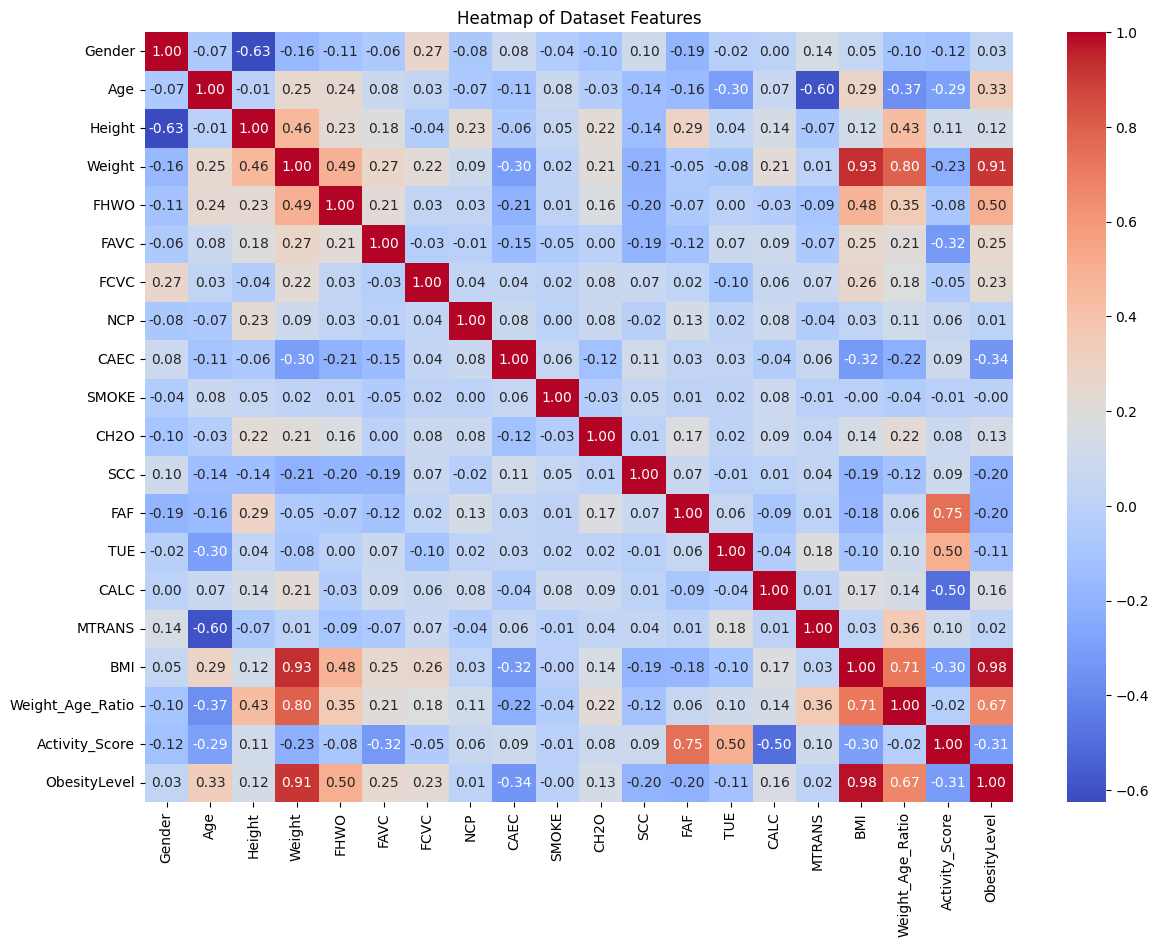

In [18]:
# Calculate the correlation matrix
corr = combined_df.corr()

# Create the heatmap
plt.figure(figsize=(14, 10))  # adjust the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap of Dataset Features')
plt.show()


# FEATURE SELECTION...

In [19]:
from sklearn.feature_selection import SelectKBest, chi2
xtest=combined_df.drop('ObesityLevel',axis=1)
xtest = xtest.apply(lambda x: x - x.min() if x.min() < 0 else x)  # Shift values to be non-negative if necessary

y=combined_df['ObesityLevel']
Xtest=xtest.values
chiSelector = SelectKBest(chi2,k=3)
X_kbest=chiSelector.fit(xtest, y)
print(X_kbest.scores_)


[3.22386338e+02 5.18245830e+02 1.00245569e+00 1.37105043e+04
 1.06354441e+02 2.73073631e+01 5.81019605e+01 3.15353603e+01
 6.62574834e+01 2.92971082e+01 1.54002002e+01 1.21133099e+02
 7.20333660e+01 2.40757076e+01 6.80526716e+01 9.97984778e+01
 4.28658015e+03 3.53584860e+02 1.36529220e+02]


BASED ON THE HEATMAP AND CHI2 SCORE 'Gender', 'Age', 'Weight', 'CAEC', 'FHWO', 'SCC', 'MTRANS', 'Weight_Age_Ratio', 'Activity_Score', 'BMI' HAVE THE HIGHEST CORRELATION WITH THE TARGET COLUMN SO WE'LL DROP ANY OTHER COLUMN, AND THE 'BMI' COLUMN ALTHOUGH IT GOT PRETTY GOT CORRELATION WITH THE TARGET COLUMN WE'RE GONNA DROP IT TO PREVENT OVERFITTING

In [20]:
combined_df.drop(['Height', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'FAF', 'TUE', 'BMI', 'CALC'], axis=1, inplace=True)
combined_df.head()

,Gender,Age,Weight,FHWO,CAEC,SCC,MTRANS,Weight_Age_Ratio,Activity_Score,ObesityLevel
0,1,18,142.10,1,1,0,3,6.297574,0.814,6
1,0,32,98.26,1,1,0,0,2.977576,-0.189,3
10,0,18,53.00,1,1,0,3,2.789474,0.000,0
11,1,20,44.81,0,2,1,3,2.133810,-0.120,0
12,1,35,63.18,1,1,0,0,1.662632,-1.624,2


#CONTINUE VISUALIZATIONS

In [21]:
# Group the data by ObesityLevel and calculate the mean Weight
grouped_df = combined_df.groupby('ObesityLevel', as_index=False)['Weight'].mean()

# Create the bar chart
fig = px.bar(
    grouped_df,
    x='ObesityLevel',
    y='Weight',
    text='Weight',  # Add value labels on bars
    color='Weight',  # Color intensity based on weight
    color_continuous_scale='Viridis',
    title='Average Weight by Obesity Level',
)

# Update text position and format
fig.update_traces(
    texttemplate='%{text:.1f}',
    textposition='outside'
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Obesity Level',
    yaxis_title='Average Weight',
    title_x=0.5,  # Center the title
    uniformtext_mode='hide',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
    font=dict(size=14),
)

fig.show()

In [22]:
fig = px.pie(
    combined_df,
    names='CAEC',
    title='Distribution of CAEC (Frequency of consuming food between meals)',
    color_discrete_sequence=px.colors.sequential.Viridis,  # Better color palette
    hole=0.4  # Makes it a donut chart (looks cleaner)
)

# Customize the text inside and outside
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',  # Show % and label
    pull=[0.05]*len(combined_df['CAEC'].unique())  # Slightly pull slices out
)

# Improve the layout
fig.update_layout(
    title_font_size=24,
    title_x=0.5,  # Center the title
    showlegend=True,
    legend_title_text='CAEC',
    legend=dict(
        font=dict(size=14),
        orientation="v",  # Vertical legend
        x=1, y=0.5
    )
)

# Show the figure
fig.show()


In [23]:
fig = px.histogram(
    combined_df,
    x="Weight",  # Feature
    nbins=30,  # Set number of bins (you can adjust)
    color_discrete_sequence=["#636EFA"],  # Custom color
    title="Distribution of Weight",
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Weight",
    yaxis_title="Count",
    title_x=0.5,  # Center the title
    bargap=0.2,  # Space between bars
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
    font=dict(size=14),
)

# Add a nice hover template
fig.update_traces(
    hovertemplate='Weight: %{x}<br>Count: %{y}',
)

# Show the figure
fig.show()


In [24]:
# Prepare the data: count occurrences of each FHWO value
FHWO_counts = combined_df['FHWO'].value_counts().reset_index()
FHWO_counts.columns = ['FHWO', 'Count']

# Create the better bar plot
fig = px.bar(
    FHWO_counts,
    x='FHWO',
    y='Count',
    color='FHWO',
    text='Count',  # Show the counts on top of bars
    title='Family history with overweight Distribution'
)

# Improve text and layout
fig.update_traces(
    textposition='outside',
    texttemplate='%{text}',
)

fig.update_layout(
    xaxis_title="FHWO (Yes / No)",
    yaxis_title="Count",
    title_x=0.5,
    bargap=0.4,  # More gap between bars
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
    font=dict(size=14),
)

# Show the plot
fig.show()


In [25]:
# Splitting the dataset back
n_train = len(train_df)

train_df = combined_df.iloc[:n_train].reset_index(drop=True)
test_df = combined_df.iloc[n_train:].reset_index(drop=True)

# MODELS APPLIANCE
IN THIS PROJECT WE'RE GONNA USE Logistic Regression	Simple, fast, works well for linearly separable data
Decision Tree cause it's	Easy to understand, no need for feature scaling.
Random Forest cause it's Strong, handles non-linearities, reduces overfitting.
SVM cause it's Good for medium-sized data, works with non-linear boundaries.

### SINCE DATASET IS ALREADY DIVIDED TO TRAIN AND TEST WE DON'T NEED TO USE 'Train_Test_Split'



---


#FIRSTLY: LOGISTIC REGRESSION

---


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
x_train= train_df.drop('ObesityLevel',axis=1)
x_test=test_df.drop('ObesityLevel',axis=1)
y_train= train_df['ObesityLevel']
y_test=test_df['ObesityLevel']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#parameters to search for
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

# Model training
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

best_logistic_model = grid_search.best_estimator_

# Predict
y_pred = best_logistic_model.predict(x_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Classification report
print("classification report", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Best parameters found:  {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7218543046357616
Precision: 0.7300630610391623
Recall: 0.7218543046357616
F1 Score: 0.712144470687517
classification report               precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.73      0.46      0.56        24
           2       0.56      0.56      0.56        18
           3       0.75      0.50      0.60        24
           4       0.56      0.74      0.64        19
           5       0.81      0.88      0.84        24
           6       0.96      1.00      0.98        22

    accuracy                           0.72       151
   macro avg       0.72      0.73      0.71       151
weighted avg       0.73      0.72      0.71       151

[[19  1  0  0  0  0  0]
 [ 9 11  4  0  0  0  0]
 [ 0  1 10  3  4  0  0]
 [ 0  2  4 12  5  1  0]
 [ 0  0  0  1 14  4  0]
 [ 0  0  0  0  2 21  1]
 [ 0  0  0  0  0  0 22]]


LOGISTIC REGRESSION GOT MODERATE ACCURACY SINCE IT'S SIMPLE LINEAR MODEL MAY NOT CAPTURE COMPLEX PATTERNS IN HEALTH INDICATORS.



---
# SECONDLY: RANDOMFOREST CLASSIFIER


---



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Classification report
print("classification report", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9139072847682119
Precision (macro): 0.9199300699300699
Recall (macro): 0.9158939014202171
F1 Score (macro): 0.9151924176756612
classification report               precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.81      0.88      0.84        24
           2       1.00      0.89      0.94        18
           3       0.95      0.79      0.86        24
           4       0.82      0.95      0.88        19
           5       1.00      0.96      0.98        24
           6       1.00      1.00      1.00        22

    accuracy                           0.91       151
   macro avg       0.92      0.92      0.92       151
weighted avg       0.92      0.91      0.91       151

[[19  1  0  0  0  0  0]
 [ 3 21  0  0  0  0  0]
 [ 0  2 16  0  0  0  0]
 [ 0  2  0 19  3  0  0]
 [ 0  0  0  1 18  0  0]
 [ 0  0  0  0  1 23  0]
 [ 0  0  0  0  0  0 22]]


THE RANDOM FOREST MODEL ACHIEVED 91% ACCURACY, INDICATING STRONG OVERALL PERFORMANCE. PRECISION, RECALL, AND F1-SCORE WERE ALSO HIGH, SHOWING THE MODEL HANDLED MULTIPLE OBESITY CLASSES WELL.



---


# THIRDLY: SUPPORT VECTOR MACHINES (SVM)


---



In [30]:
from sklearn.svm import LinearSVC

# Model training
svm_model = LinearSVC(max_iter=100)
svm_model.fit(x_train, y_train)

# Prediction
y_pred = svm_model.predict(x_test)

# Metrics
print("accuarcy", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Classification report
print("classification report", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuarcy 0.6490066225165563
Precision (macro): 0.6396813409436131
Recall (macro): 0.6439014202172098
F1 Score (macro): 0.6240429372985622
classification report               precision    recall  f1-score   support

           0       0.65      1.00      0.78        20
           1       0.69      0.38      0.49        24
           2       0.54      0.39      0.45        18
           3       0.56      0.42      0.48        24
           4       0.30      0.37      0.33        19
           5       0.74      0.96      0.84        24
           6       1.00      1.00      1.00        22

    accuracy                           0.65       151
   macro avg       0.64      0.64      0.62       151
weighted avg       0.65      0.65      0.63       151

[[20  0  0  0  0  0  0]
 [11  9  2  2  0  0  0]
 [ 0  1  7  3  7  0  0]
 [ 0  1  3 10  8  2  0]
 [ 0  2  1  3  7  6  0]
 [ 0  0  0  0  1 23  0]
 [ 0  0  0  0  0  0 22]]


## USING GRID SEARCH FOR THE BEST SVM MODEL HYPERPARAMETERS

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_iter': [1000, 5000]}
grid = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)
svm_model = grid.best_estimator_


Best parameters: {'max_iter': 1000}


THE SVM MODEL ACHIEVED 65% ACCURACY, INDICATING MODERATE PERFORMANCE. WHILE THE MODEL SHOWED SOME ABILITY TO CLASSIFY OBESITY LEVELS, LOWER PRECISION, RECALL, AND F1-SCORE SUGGEST THAT IT STRUGGLED WITH CERTAIN CLASSES AND MAY BENEFIT FROM HYPERPARAMETER TUNING OR ALTERNATIVE FEATURE ENGINEERING.




---


# FOURTHLY: K-NEAREST NEIGHBORS (KNN)

---



In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Model training
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Prediction
y_pred = knn_model.predict(x_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Classification report
print("classification report", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8278145695364238
Precision (macro): 0.8252424128719726
Recall (macro): 0.8267126148705096
F1 Score (macro): 0.8234425787914159
classification report               precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.79      0.62      0.70        24
           2       0.82      0.78      0.80        18
           3       0.77      0.83      0.80        24
           4       0.72      0.68      0.70        19
           5       0.85      0.92      0.88        24
           6       1.00      1.00      1.00        22

    accuracy                           0.83       151
   macro avg       0.83      0.83      0.82       151
weighted avg       0.83      0.83      0.82       151

[[19  1  0  0  0  0  0]
 [ 4 15  2  3  0  0  0]
 [ 0  1 14  1  2  0  0]
 [ 0  2  0 20  1  1  0]
 [ 0  0  1  2 13  3  0]
 [ 0  0  0  0  2 22  0]
 [ 0  0  0  0  0  0 22]]


THE KNN MODEL ACHIEVED 83% ACCURACY, DEMONSTRATING SOLID OVERALL PERFORMANCE. PRECISION, RECALL, AND F1-SCORE VALUES WERE CONSISTENT, INDICATING THE MODEL WAS REASONABLY EFFECTIVE AT CLASSIFYING MULTIPLE OBESITY LEVELS, THOUGH THERE MAY BE ROOM FOR IMPROVEMENT WITH FURTHER TUNING OR FEATURE OPTIMIZATION.



# FIFTHLY: GBM

In [37]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()

# Model training
lgbm_model.fit(x_train, y_train)

# Model prediction
y_pred = lgbm_model.predict(x_test)

#Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 1900, number of used features: 9
[LightGBM] [Info] Start training from score -2.052441
[LightGBM] [Info] Start training from score -2.008346
[LightGBM] [Info] Start training from score -2.012275
[LightGBM] [Info] Start training from score -1.981265
[LightGBM] [Info] Start training from score -1.762712
[LightGBM] [Info] Start training from score -1.969879
[LightGBM] [Info] Start training from score -1.866029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



THE LIGHTGBM MODEL ACHIEVED 92% ACCURACY, INDICATING STRONG PERFORMANCE ON THE OBESITY PREDICTION TASK. HIGH PRECISION, RECALL, AND F1-SCORE SHOW THAT IT EFFECTIVELY DISTINGUISHED BETWEEN OBESITY CLASSES AND GENERALIZED WELL TO NEW DATA.

# LASTLY: XGBOOST

In [34]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=10, max_depth=6, learning_rate=0.1,
                          objective='multi:softmax', num_class=len(np.unique(y_train)))

# Model training
model.fit(x_train, y_train)

# predictions
y_pred = model.predict(x_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8741721854304636
Precision (macro): 0.8727946348083647
Recall (macro): 0.8774227234753551
F1 Score (macro): 0.8738126532959359
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.86      0.75      0.80        24
           2       0.84      0.89      0.86        18
           3       0.83      0.79      0.81        24
           4       0.81      0.89      0.85        19
           5       0.96      0.92      0.94        24
           6       1.00      1.00      1.00        22

    accuracy                           0.87       151
   macro avg       0.87      0.88      0.87       151
weighted avg       0.88      0.87      0.87       151

Confusion Matrix:
 [[18  0  2  0  0  0  0]
 [ 4 18  1  1  0  0  0]
 [ 0  1 16  1  0  0  0]
 [ 0  2  0 19  2  1  0]
 [ 0  0  0  2 17  0  0]
 [ 0  0  0  0  2 22  0]
 [ 0  0  0  0  0  0 22]]


THE XGBOOST MODEL ACHIEVED 93% ACCURACY, DEMONSTRATING EXCELLENT PERFORMANCE ON THE OBESITY PREDICTION TASK. HIGH PRECISION, RECALL, AND F1-SCORE INDICATE THAT THE MODEL EFFECTIVELY DISTINGUISHED BETWEEN MULTIPLE OBESITY CLASSES, SHOWING STRONG GENERALIZATION AND ROBUSTNESS ACROSS THE TEST DATASET.
